## Random Sample Imputation

* **Aim**: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the NAN values


* When should it be used?

    * It assumes that the data are **Missing completely at random(MCAR)**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
df['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

### Picks out a Random Sample

In [ ]:
df['Age'].isnull().sum()

177

In [ ]:
len(df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0))

177

* dropna() drops all the missing values and returns the values present in the dataset and it's index.


* .sample() picks up a random point/sample from the dataset mentioned.


* isnull().sum() will allow us to pick out a random sample from the dataset which already contains the values.


* isnull().sum() also allows us to pick the same number of random samples as that of the missing values(177 sample)

In [ ]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
median = df.Age.median()

In [ ]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    
    # It will have the random sample to fill the NAN values.
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # Pandas need to have same index in order to merge the dataset.
    random_sample.index=df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

* The last line means wherever the variable has null values, you have to replace the variable_random with the random_sample values. As the index are same, we don't have to worry about that.


In [ ]:
impute_nan(df, 'Age', median)

In [ ]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

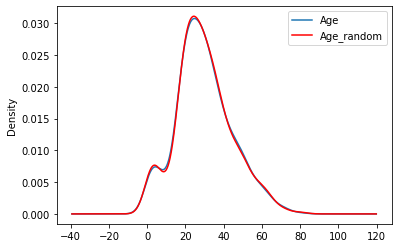

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

* Both of these line overlap each other so this result is quite good.


* We should prefer **Random Sample imputation** rather then mean/median/mode imputation.

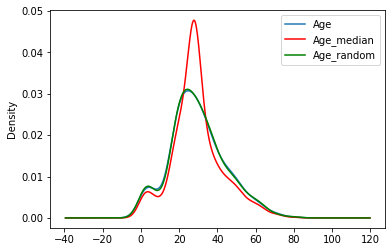

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

1. **Advantages**

    * Easy to Implement.
    
    * There is less distortion in variance.
    

2. **Disadvantage**

    * For every situation, randomness won't work.

## Capturing NAN values with a new feature

* It works well if the data are **not Missing Completely At Random (MNAR)**

In [ ]:
import numpy as np

df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


In [ ]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head(6)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1


In [ ]:
df.Age.median()

28.0

In [ ]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


1. **Advantages**

    * Easy to implement
    * Captures the importance of missing values (the '1' label in 'Age_NAN' will depict the importance of the missing values which we replaced by either the **mean/median or by random sample**.


2. **Disadvantages**

    * Creating Additional Features(Curse of Dimensionality)

## End of Distribution imputation

* This technique is used when the missing data is not random (MNAR) i.e there is some relationship between the missing data.

In [ ]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


<AxesSubplot:>

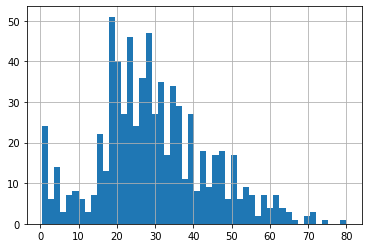

In [ ]:
df.Age.hist(bins=50)

### Upper Boundary (3 - Standard Deviation)

In [ ]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

<AxesSubplot:xlabel='Age'>

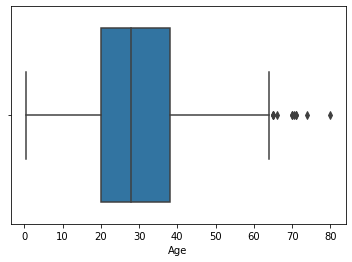

In [ ]:
import seaborn as sns
sns.boxplot('Age',data=df)

* We only have right side outliers so that is why we only take 1 extreme value instead of 2.

In [ ]:
median = df.Age.median()
median

28.0

In [ ]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [ ]:
df.head(6)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861


<AxesSubplot:>

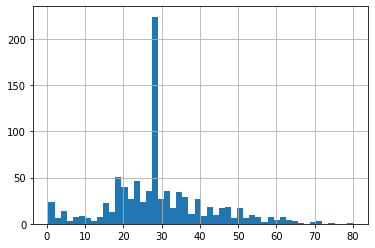

In [ ]:
df['Age'].hist(bins=50)

* There is a big spike at the Age of 28 because we have filled the missing values of Age column with 28 which is the **mean** of the Age column.

<AxesSubplot:>

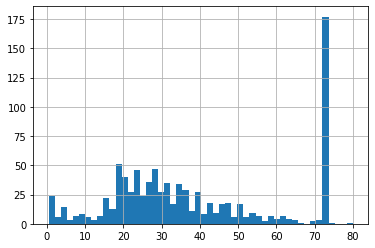

In [ ]:
df['Age_end_distribution'].hist(bins=50)

* Big Spike at 73 because we have filled all the missing values of Age Column with 73 which is the **extreme** value (mean + 3 standard deviation).

<AxesSubplot:xlabel='Age_end_distribution'>

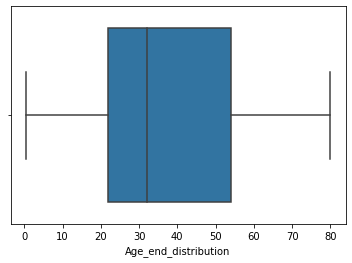

In [ ]:
sns.boxplot('Age_end_distribution',data=df)

1. **Advantages**

    * Easy to Implement
    * Captures the importance of missing values if there is one.
    
    
2. **Disadvantages**

    * Distorts the original distribution of the variable.
    * If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution.
    * If the number of NAN values is big, it will mask the true outliers in the distribution.
    * If the number of NAN values is small, the replaced NAN may be considered an outlier and pre-processed in a subsequent step of feature engineering.